# Differentiation With JAX

This notebook shows a quick introduction on how to compute derivatives (see the IntroToAutodiff notebook for a much more comprehensive introduction)

`jax` is designed as a drop in replacement for `numpy` so if you have `numpy` code you can make it differentiable easily by either

1. `import jax.numpy as np`

or if you don't like that much black magic and want to know whether you use `jax` or `numpy` you can to 

2. `import jax.numpy as jnp`

but then you need to change all occurences of `np.foo` to `jnp.foo`

I would recommend the latter as the aspiration to be a drop-in replacement works 99% of the time but there are always edge cases

Let's try to define a complicated looking function:

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

def func(x):
    return (3*x+jnp.sin(3*x))*jnp.exp(-x/2.)

/Users/lukasheinrich/Code/iml_tutorial/_venv/lib/python3.9/site-packages/jax/_src/lib/__init__.py:33: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


We can plot it as usual using `matplotlib`

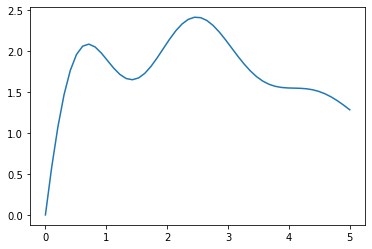

In [2]:
xi = jnp.linspace(0,5)
yi = [func(xx) for xx in xi]
plt.plot(xi,yi)

In order to get gradients you simply call `jax.grad()` on the function

Note: this works only for "scalar" functions $\mathbb{R}^n \to \mathbb{R}$. If you want to have more general jacobian matrices you can use `jax.jacobian()`

In [4]:
func(2.0)

DeviceArray(2.1044855, dtype=float32, weak_type=True)

You can get the gradient at the same $x$ like so

In [6]:
jax.grad(func)(2.0)

DeviceArray(1.1110764, dtype=float32, weak_type=True)

Often you are interested in both the gradient *and* the function value.. so there is a nice API for that as well

In [7]:
jax.value_and_grad(func)(2.0)

(DeviceArray(2.1044855, dtype=float32, weak_type=True),
 DeviceArray(1.1110764, dtype=float32, weak_type=True))

We can now plot the function and its tangens very easily

Note: the list comprehensions `[ .. for ... in ]` are python and thus slow.. check out `JaxParallelization.ipynb` to see how to `map` over multiple values in a much more efficient way.

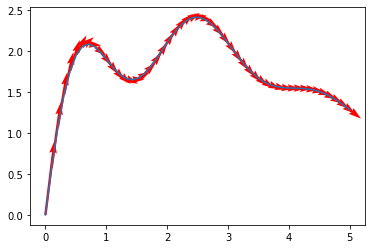

In [8]:
xi = jnp.linspace(0,5)
yi = jnp.array([func(xx) for xx in xi])
gi = jnp.array([jax.grad(func)(xx) for xx in xi])
plt.plot(xi,yi)
plt.quiver(xi,yi,jnp.ones_like(gi),gi,units='xy',angles='xy', color = 'r')

## Higher Order Gradients


`jax` allows you to compute higher order gradients without any issues by just re-wrapping the gradient function multiple types in `jax.grad(...)`

Tip: try redefining `func` for a few functions and see if the gradients match your expectation

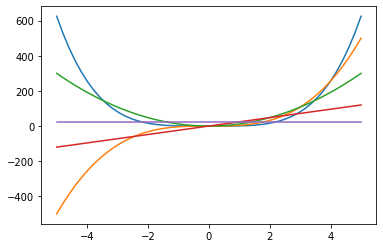

In [10]:
def func(x):
#     return jnp.cos(x)
    return x**4

xi = jnp.linspace(-5,5)
yi = func(xi)
g1 = jax.vmap(jax.grad(func))(xi)
g2 = jax.vmap(jax.grad(jax.grad(func)))(xi)
g3 = jax.vmap(jax.grad(jax.grad(jax.grad(func))))(xi)
g4 = jax.vmap(jax.grad(jax.grad(jax.grad(jax.grad(func)))))(xi)


plt.plot(xi,yi)
plt.plot(xi,g1)
plt.plot(xi,g2)
plt.plot(xi,g3)
plt.plot(xi,g4)